In [360]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
from matplotlib.pyplot import figure

In [361]:
table_2 = pd.read_csv("./Kickstarter001.csv")
table_1 = pd.read_csv ("./Kickstarter.csv")
table_3 = pd.read_csv ("./Kickstarter002.csv")
table_4 = pd.read_csv ("./Kickstarter003.csv")
table_5 = pd.read_csv ("./Kickstarter056.csv")

In [362]:
data = pd.concat([table_1, table_2, table_3, table_4, table_5], axis=0)


In [363]:
df = data[['id','backers_count','category','country_displayable_name','created_at', 'launched_at', 'deadline','currency','pledged','goal','state'] ]
df.head()

,id,backers_count,category,country_displayable_name,created_at,launched_at,deadline,currency,pledged,goal,state
0,1432554512,6,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,1534710982,1544052381,1549236381,USD,266.0,75000.0,failed
1,1925377347,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,1480480200,1482759921,1485351921,USD,260.0,6000.0,failed
2,1088749014,3,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",the United States,1478033617,1478089224,1479302424,USD,185.0,1200.0,failed
3,1876427386,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,1516675034,1523385196,1525977196,USD,35.0,10000.0,failed
4,671662806,8,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,1554695036,1555464215,1558056215,USD,261.0,20000.0,failed


In [364]:
def category_func(x):
    if "parent_name" in json.loads(x):
        return json.loads(x)["parent_name"]
    else:
        return np.nan

df["sub category"] = df["category"].apply(lambda x: json.loads(x)["name"])
df["parent category"] = df["category"].apply(category_func)
 

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [365]:
df.sample(100)

,id,backers_count,category,country_displayable_name,created_at,launched_at,deadline,currency,pledged,goal,state,sub category,parent category
180,340941897,22,"{""id"":6,""name"":""Dance"",""slug"":""dance"",""positio...",the United States,1334705775,1334954807,1337546807,USD,1728.0,1500.0,successful,Dance,NaN
3064,46995626,28,"{""id"":308,""name"":""Events"",""slug"":""food/events""...",the United States,1457140081,1460359824,1463815824,USD,4710.0,20000.0,canceled,Events,Food
2372,1640675082,11,"{""id"":287,""name"":""Ceramics"",""slug"":""art/cerami...",the United States,1498075046,1498511078,1501103078,USD,1100.0,1100.0,successful,Ceramics,Art
3232,1327862625,20,"{""id"":22,""name"":""Illustration"",""slug"":""art/ill...",the United Kingdom,1500060412,1500303608,1502895608,GBP,680.0,150.0,successful,Illustration,Art
2470,30004802,4,"{""id"":337,""name"":""Gadgets"",""slug"":""technology/...",Spain,1554980952,1559924021,1562516021,EUR,301.0,15000.0,failed,Gadgets,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,563931769,3,"{""id"":38,""name"":""Electronic Music"",""slug"":""mus...",the United Kingdom,1404667941,1404765432,1407357432,GBP,35.0,800.0,failed,Electronic Music,Music
1078,863208642,245,"{""id"":341,""name"":""Wearables"",""slug"":""technolog...",the United States,1438287190,1439221155,1442677155,USD,12567.0,21000.0,canceled,Wearables,Technology
3578,1624898178,1,"{""id"":268,""name"":""Pet Fashion"",""slug"":""fashion...",Spain,1446499493,1447265363,1449425363,EUR,18.0,60000.0,failed,Pet Fashion,Fashion
3614,1121944778,60,"{""id"":286,""name"":""Spaces"",""slug"":""theater/spac...",the United States,1487713543,1488827677,1491416077,USD,10615.0,10000.0,successful,Spaces,Theater


In [366]:
# converts unix time stamp to YYYY-MM-DD
# datetime.fromtimestamp(x).strftime('%Y-%m-%d')
    

In [367]:
df["created_at"] = df["created_at"].apply(lambda x: x)
df["launched_at"] = df["launched_at"].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df["deadline"] = df["deadline"].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df.sample(10)

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,id,backers_count,category,country_displayable_name,created_at,launched_at,deadline,currency,pledged,goal,state,sub category,parent category
3282,312387043,17,"{""id"":53,""name"":""Public Art"",""slug"":""art/publi...",the United States,1395848037,2014-04-24,2014-05-16,USD,1027.00,975.0,successful,Public Art,Art
2063,1105431649,0,"{""id"":328,""name"":""Young Adult"",""slug"":""publish...",the United States,1424621687,2015-03-14,2015-04-14,USD,0.00,10000.0,failed,Young Adult,Publishing
3465,15845461,22,"{""id"":256,""name"":""Spaces"",""slug"":""dance/spaces...",the United States,1426703212,2015-05-13,2015-06-05,USD,2025.00,2000.0,successful,Spaces,Dance
456,392416162,19,"{""id"":272,""name"":""Mobile Games"",""slug"":""games/...",Sweden,1575804935,2020-01-03,2020-02-02,SEK,3787.71,79000.0,live,Mobile Games,Games
573,1167660995,29,"{""id"":46,""name"":""Children's Books"",""slug"":""pub...",the United States,1452522479,2016-01-14,2016-02-29,USD,1375.00,1050.0,successful,Children's Books,Publishing
2705,892562728,1,"{""id"":264,""name"":""Childrenswear"",""slug"":""fashi...",the United Kingdom,1434455176,2015-08-07,2015-08-31,GBP,25.00,2950.0,failed,Childrenswear,Fashion
84,18208436,104,"{""id"":344,""name"":""Crochet"",""slug"":""crafts/croc...",the United Kingdom,1515435867,2018-01-10,2018-02-09,GBP,2173.00,1200.0,successful,Crochet,Crafts
316,403902933,92,"{""id"":24,""name"":""Performance Art"",""slug"":""art/...",the United States,1416548213,2014-11-28,2014-12-28,USD,8322.00,8000.0,successful,Performance Art,Art
2886,644628068,18,"{""id"":340,""name"":""Space Exploration"",""slug"":""t...",Spain,1493220091,2017-05-01,2017-06-20,EUR,2021.00,2000.0,successful,Space Exploration,Technology
16,20654216,126,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,1432071456,2015-05-21,2015-06-20,USD,22123.00,20000.0,successful,Science Fiction,Film & Video


In [368]:
def state_proportion(data):
    state_count = data.groupby(["state"]).size()
    return state_count

In [369]:
state_proportion(df).reset_index(name = "counts")

,state,counts
0,canceled,825
1,failed,6446
2,live,411
3,successful,10685
4,suspended,65


In [370]:
a = state_proportion(df).reset_index(name = "counts")

In [371]:
x = np.array(a.iloc[:,0])
y = np.array(a.iloc[:,1])
total = y.sum()
y/total

array([0.04475911, 0.34971788, 0.02229818, 0.57969835, 0.00352648])

Text(0.5, 1.0, 'Number of kickstarters according to different status')

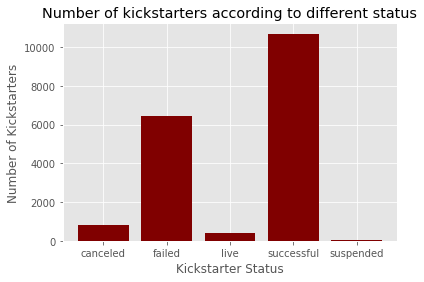

In [372]:
#status in numbers
plt.bar(x,y, color = "maroon")

plt.xlabel("Kickstarter Status") 
plt.ylabel("Number of Kickstarters") 
plt.title("Number of kickstarters according to different status")

Text(0.0, 1.0, "Kickstarters' status proportions")

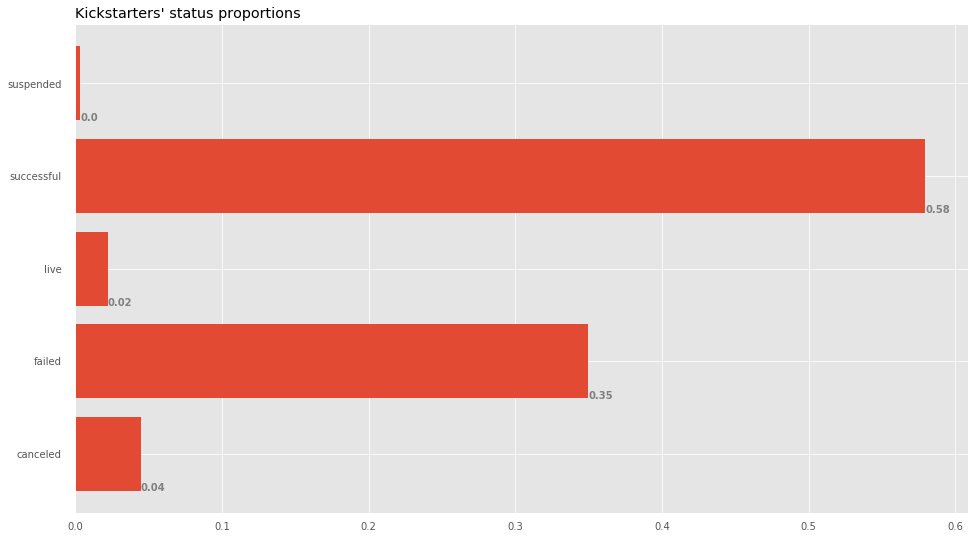

In [373]:
# status in terms of percentages
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(x, y/total)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10)
for i in ax.patches: 
    plt.text(i.get_width(), i.get_y(),  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey')
    
ax.set_title("Kickstarters' status proportions", 
             loc ='left', ) 

In [374]:
df.head()

,id,backers_count,category,country_displayable_name,created_at,launched_at,deadline,currency,pledged,goal,state,sub category,parent category
0,1432554512,6,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,1534710982,2018-12-05,2019-02-03,USD,266.0,75000.0,failed,Restaurants,Food
1,1925377347,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,1480480200,2016-12-26,2017-01-25,USD,260.0,6000.0,failed,Webseries,Film & Video
2,1088749014,3,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",the United States,1478033617,2016-11-02,2016-11-16,USD,185.0,1200.0,failed,Photobooks,Photography
3,1876427386,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,1516675034,2018-04-10,2018-05-10,USD,35.0,10000.0,failed,Webseries,Film & Video
4,671662806,8,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,1554695036,2019-04-16,2019-05-16,USD,261.0,20000.0,failed,Science Fiction,Film & Video


In [375]:
# number of distinct parent categories
df["parent category"].value_counts().count()
# number of distinct sub categories
df["sub category"].value_counts().count()


159

In [376]:
# Most popular categories
# 17801 rows after removing nans

categories = df.groupby(["parent category"]).size().reset_index(name = "counts")
categories.sort_values(["counts"], ascending =False)


,parent category,counts
6,Film & Video,2569
10,Music,2398
13,Technology,1977
0,Art,1797
12,Publishing,1703
8,Games,1252
7,Food,1117
5,Fashion,994
4,Design,860
11,Photography,740


Text(0.5, 1.0, 'kickstarters over different categories')

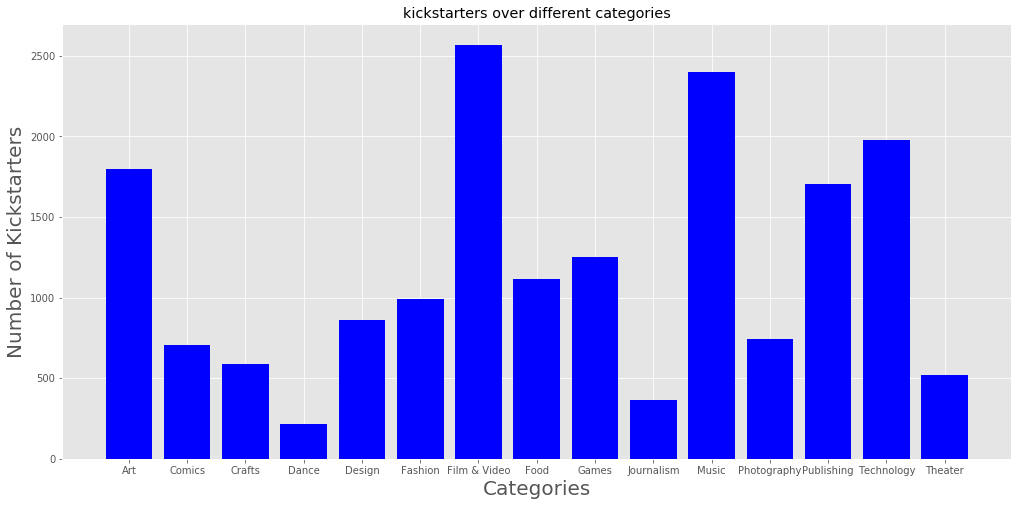

In [377]:
x_ = np.array(categories.iloc[:,0])
y_ = np.array(categories.iloc[:,1])
total = y_.sum()


#categories in numbers
fig,ax = plt.subplots(figsize=(17,8))
plt.bar(x_,y_, color = "blue")

plt.xlabel("Categories", fontsize=20) 
plt.ylabel("Number of Kickstarters", fontsize=20) 
plt.title("kickstarters over different categories")

In [378]:
# most popular sub categories
sub_categories = df.groupby(["parent category", "sub category"]).size()
sub_categories = sub_categories.reset_index(name= "sub_counts")
sub_categories.sort_values(["sub_counts"], ascending = False)



,parent category,sub category,sub_counts
39,Design,Product Design,425
85,Games,Tabletop Games,406
140,Technology,Hardware,284
50,Film & Video,Animation,277
42,Fashion,Apparel,275
...,...,...,...
93,Music,Chiptune,2
28,Crafts,Taxidermy,1
130,Publishing,Translations,1
125,Publishing,Literary Spaces,1


In [379]:
df.groupby(['parent category','state']).count()[["sub category"]].reset_index().sort_values(["sub category"], ascending=False)

,parent category,state,sub category
52,Music,successful,1589
32,Film & Video,successful,1491
62,Publishing,successful,1180
3,Art,successful,1037
65,Technology,failed,1006
...,...,...,...
16,Dance,live,3
18,Dance,suspended,2
23,Design,suspended,2
53,Music,suspended,1


In [380]:
categories_ = df.groupby(["parent category", "state"]).size().reset_index(name = "counts")
# categories_.sort_values(["counts"], ascending =False)
categories_

,parent category,state,counts
0,Art,canceled,85
1,Art,failed,643
2,Art,live,27
3,Art,successful,1037
4,Art,suspended,5
...,...,...,...
69,Theater,canceled,27
70,Theater,failed,131
71,Theater,live,5
72,Theater,successful,355


Text(0, 0.5, 'Number of Kickstarters')

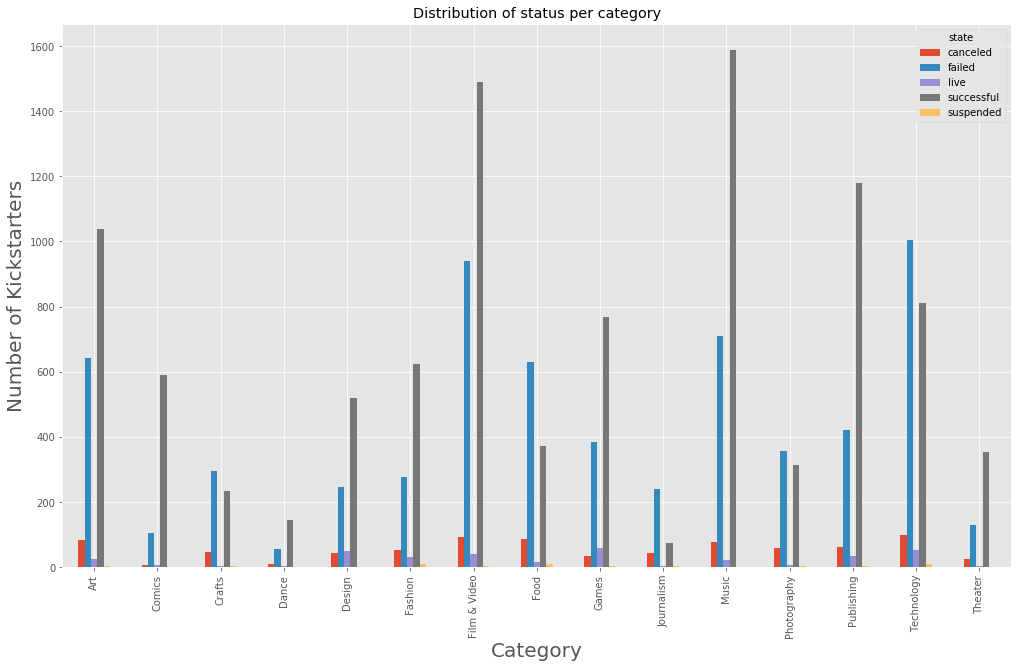

In [381]:
# number of failures and success per category
ax = categories_.pivot("parent category" , "state", "counts").plot(kind='bar', figsize=(17,10), title = "Distribution of status per category")

ax.set_xlabel("Category", fontsize=20)
ax.set_ylabel("Number of Kickstarters", fontsize=20)